In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import numpy as np
import sigpy as sp
import sigpy.mri as mr
import sigpy.mri.rf as rf
import sigpy.plot as pl
import scipy.signal as signal
import matplotlib.pyplot as pyplot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Design and simulate a 45-degree BIR-4 pulse

In [3]:
# Design it
n = 1176
dt = 4e-6
dw0 = 100*np.pi/dt/n
beta = 10
kappa = np.arctan(20)
flip = np.pi/4
[am_bir, om_bir] = rf.adiabatic.bir4(n, beta, kappa, flip, dw0)

<IPython.core.display.Javascript object>


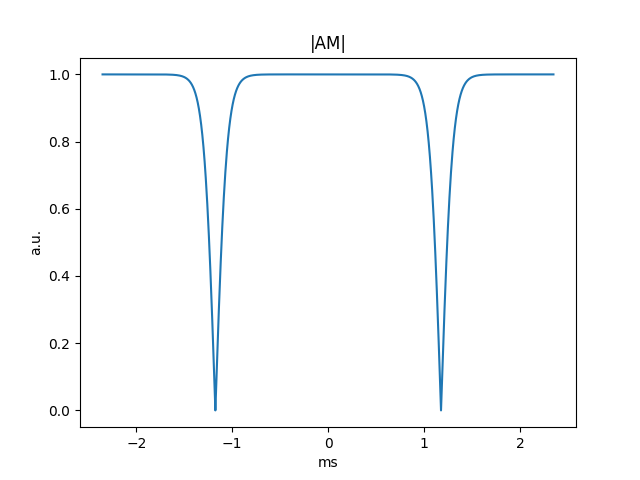

<IPython.core.display.Javascript object>


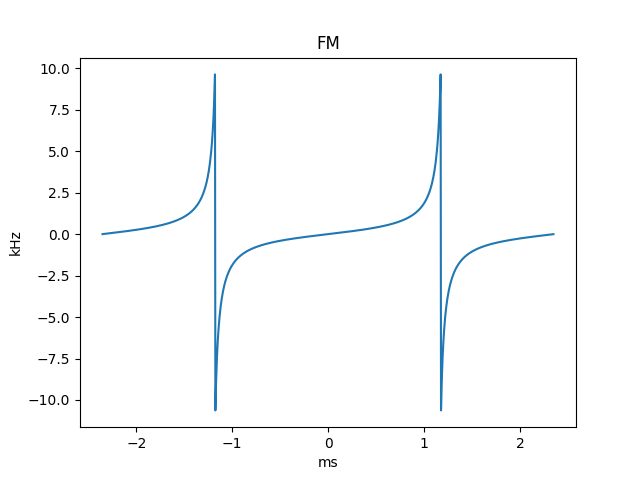

Text(0.5, 1.0, 'FM')

In [4]:
# Plot it
T = n*dt
t = np.arange(-T/2,T/2,dt)*1000
pyplot.figure()
pyplot.plot(t, np.abs(am_bir))
pyplot.xlabel('ms')
pyplot.ylabel('a.u.')
pyplot.title('|AM|')
pyplot.figure()
pyplot.plot(t, om_bir/(2*np.pi*1000))
pyplot.xlabel('ms')
pyplot.ylabel('kHz')
pyplot.title('FM')

<IPython.core.display.Javascript object>


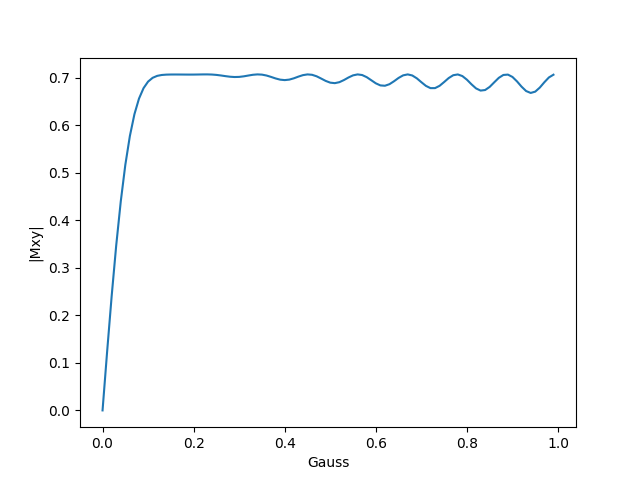

Text(0, 0.5, '|Mxy|')

In [6]:
# Simulate it across B1 amplitudes
b1 = np.arange(0, 1, 0.01) # b1 grid we simulate the pulse over, Gauss
b1 = np.reshape(b1, (np.size(b1),1))
a = np.zeros(np.shape(b1), dtype = 'complex')
b = np.zeros(np.shape(b1), dtype = 'complex')
for ii in range(0, np.size(b1)):
    [a[ii], b[ii]] = rf.sim.abrm_nd(2*np.pi*dt*4258*b1[ii]*am_bir, np.ones(1), dt*np.reshape(om_bir,(np.size(om_bir),1)))
Mxy = 2*np.multiply(np.conj(a), b)
pyplot.figure()
pyplot.plot(b1, np.abs(Mxy))
pyplot.xlabel('Gauss')
pyplot.ylabel('|Mxy|')

# Design a hyperbolic secant inversion pulse

In [7]:
# Design it
n = 512
beta = 800
mu = 4.9
T = 0.012
[am_sech, om_sech] = rf.adiabatic.hypsec(n, beta, mu, T)

<IPython.core.display.Javascript object>


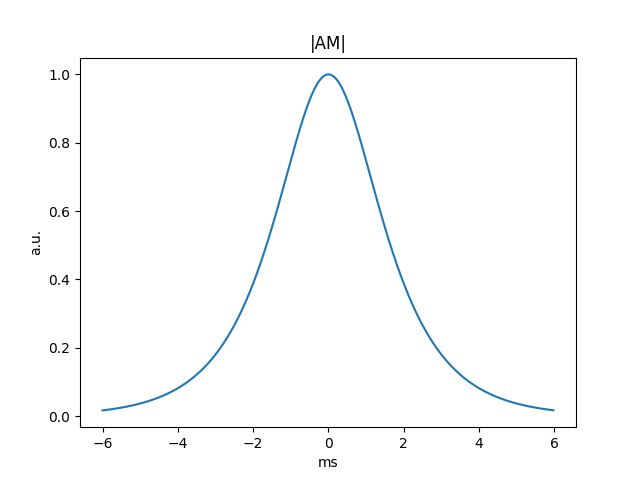

<IPython.core.display.Javascript object>


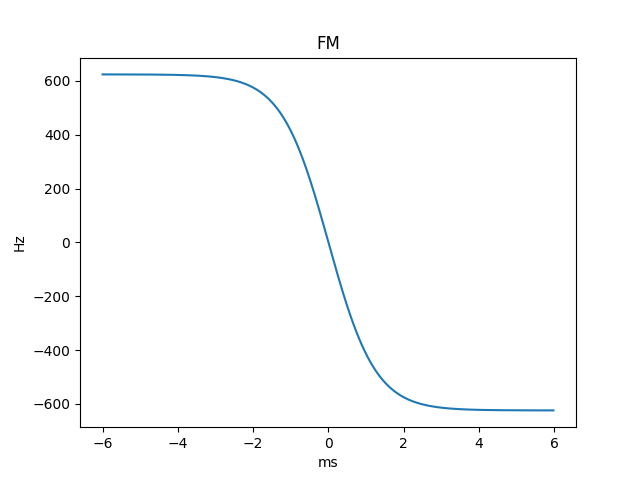

Text(0.5, 1.0, 'FM')

In [8]:
# Plot it
t = np.arange(-T/2,T/2,T/n)*1000
pyplot.figure()
pyplot.plot(t, np.abs(am_sech))
pyplot.xlabel('ms')
pyplot.ylabel('a.u.')
pyplot.title('|AM|')
pyplot.figure()
pyplot.plot(t, om_sech/(2*np.pi))
pyplot.xlabel('ms')
pyplot.ylabel('Hz')
pyplot.title('FM')

<IPython.core.display.Javascript object>


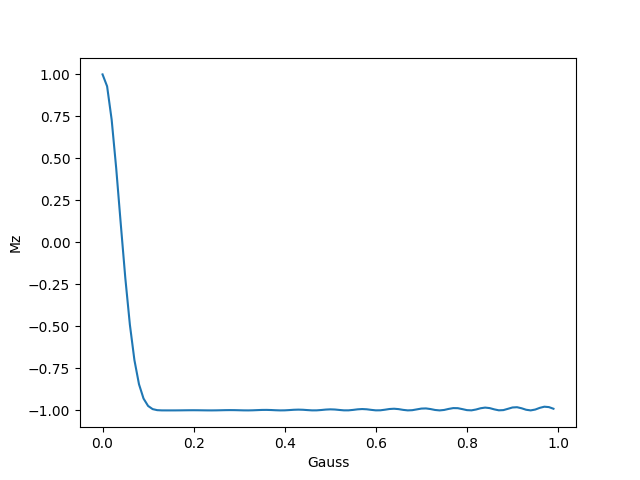

Text(0, 0.5, 'Mz')

In [9]:
# Simulate it
a = np.zeros(np.shape(b1), dtype = 'complex')
b = np.zeros(np.shape(b1), dtype = 'complex')
for ii in range(0, np.size(b1)):
    [a[ii], b[ii]] = rf.sim.abrm_nd(2*np.pi*(T/n)*4258*b1[ii]*am_sech, np.ones(1), T/n*np.reshape(om_sech,(np.size(om_sech),1)))
Mz = 1-2*np.abs(b)**2
pyplot.figure()
pyplot.plot(b1, Mz)
pyplot.xlabel('Gauss')
pyplot.ylabel('Mz')

# Design a WURST pulse

In [10]:
# Design it
n = 1024
N_fac = 40
bw = 40e3
T = 10e-3
[am_wurst, om_wurst] = rf.adiabatic.wurst(n, N_fac, bw, T)

<IPython.core.display.Javascript object>


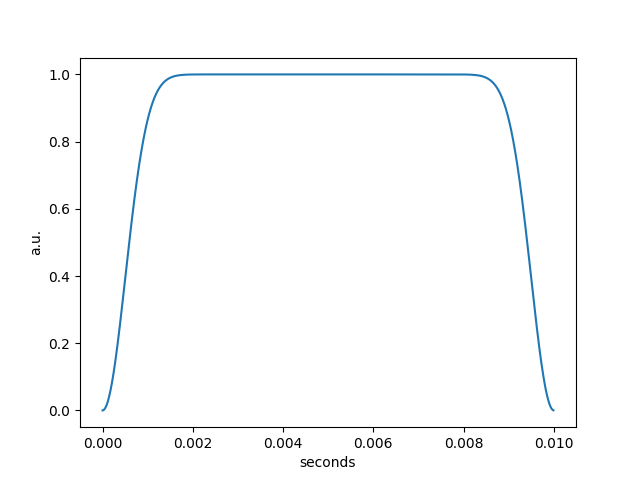

<IPython.core.display.Javascript object>


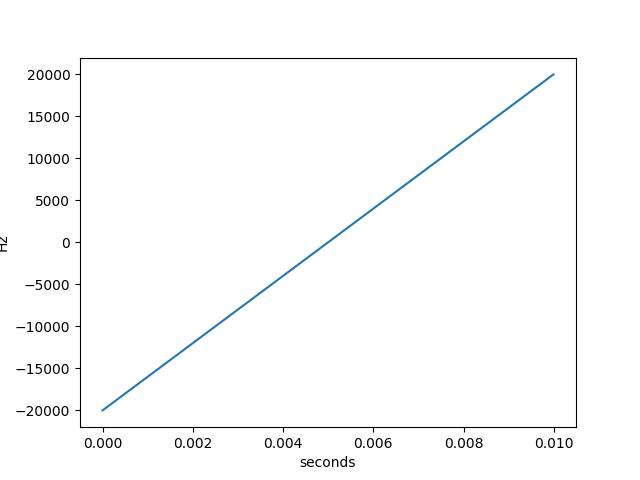

Text(0.5, 0, 'seconds')

In [11]:
# Plot it
t = np.arange(0, n)*T/n
pyplot.figure()
pyplot.plot(t, am_wurst)
pyplot.ylabel('a.u.')
pyplot.xlabel('seconds')
pyplot.figure()
pyplot.plot(t, om_wurst/(2*np.pi))
pyplot.ylabel('Hz')
pyplot.xlabel('seconds')


<IPython.core.display.Javascript object>


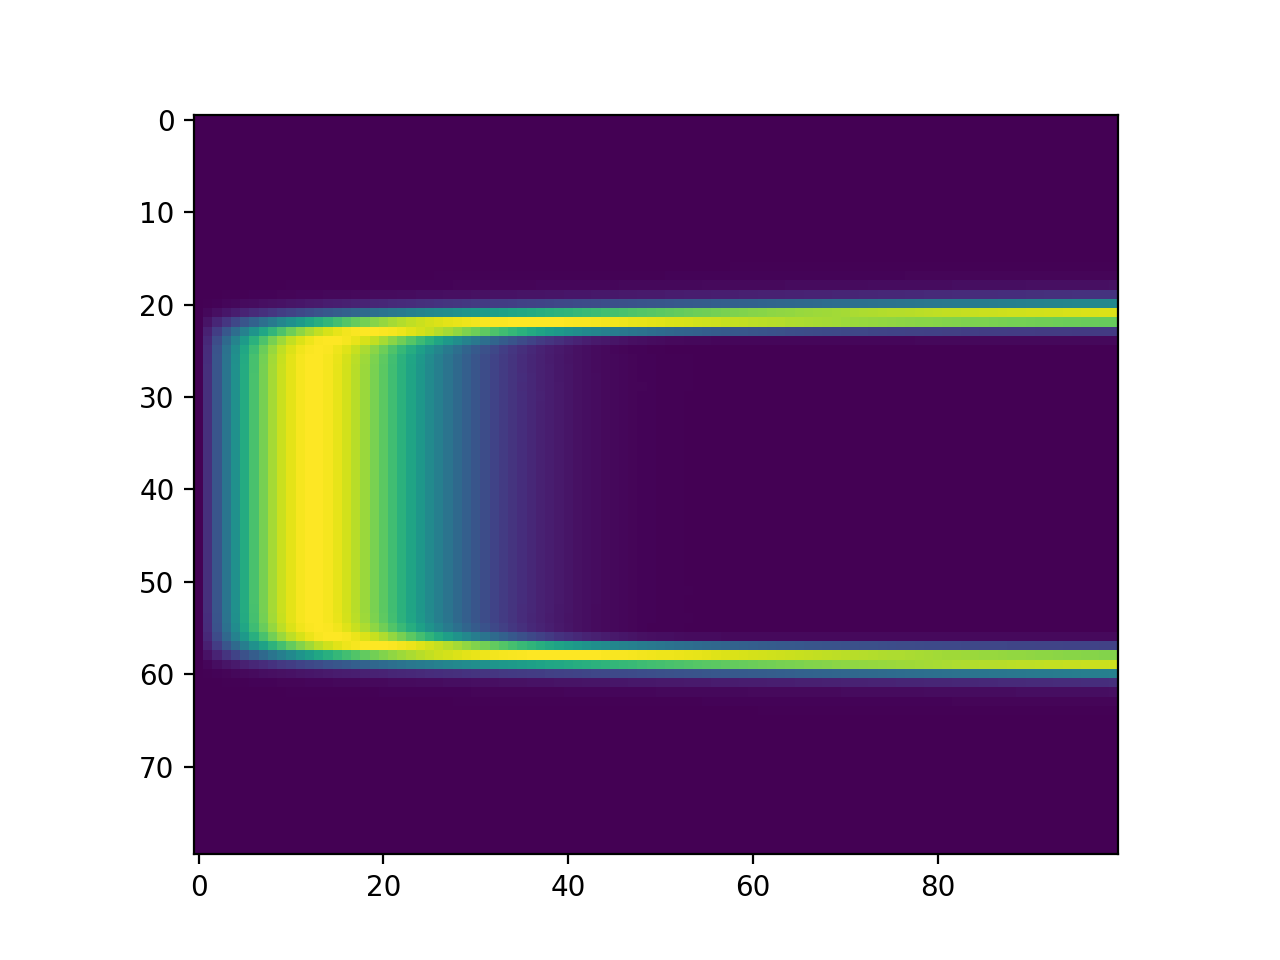

In [81]:
# Simulate it across off-resonance frequencies
df = np.arange(-40e3, 40e3, 1000) # Hz
a = np.zeros((np.size(df), np.size(b1)), dtype = 'complex')
b = np.zeros((np.size(df), np.size(b1)), dtype = 'complex')
for ii in range(0, np.size(b1)):
    [a[:, ii], b[:, ii]] = rf.sim.abrm_hp(2*np.pi*(T/n)*4258*b1[ii]*am_wurst, 
                                        T/n*om_wurst, np.ones(np.size(df)), df*2*np.pi*(T/n))

Mxy = 2*np.conj(a)*b
Mz = 1 - 2*np.abs(b)**2

pyplot.figure()
pyplot.imshow(np.abs(Mxy))

# Design a GOIA-WURST Pulse

In [34]:
# Design it
n = 512
T = 3.5e-3
f = 0.9
n_b1 = 16
m_grad = 4
[am_goia, om_goia, g_goia] = rf.adiabatic.goia_wurst(n, T, f, n_b1, m_grad)

<IPython.core.display.Javascript object>


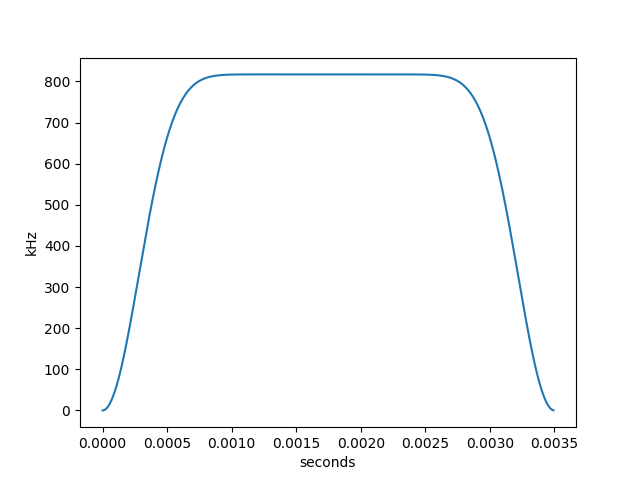

<IPython.core.display.Javascript object>


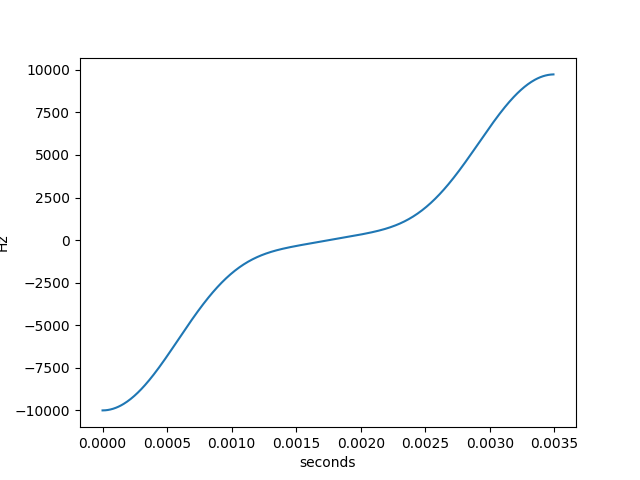

<IPython.core.display.Javascript object>


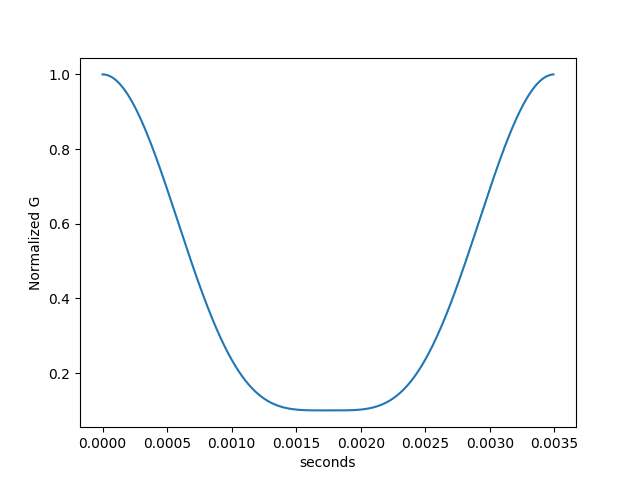

Text(0.5, 0, 'seconds')

In [35]:
# Plot it
t = np.arange(0, n)*T/n
pyplot.figure()
pyplot.plot(t, am_goia)
pyplot.ylabel('kHz')
pyplot.xlabel('seconds')
pyplot.figure()
pyplot.plot(t, om_goia)
pyplot.ylabel('Hz')
pyplot.xlabel('seconds')
pyplot.figure()
pyplot.plot(t, g_goia)
pyplot.ylabel('Normalized G')
pyplot.xlabel('seconds')